In [2]:
#Importar librerías + Estilo Gráfico (Cuadricula)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath("..") + "/src") #pa importar la carpeta
from data_loader import cargar_dataset


sns.set(style="darkgrid")

In [4]:
ruta = "../data/dataset.csv"   
df = cargar_dataset(ruta)
df.head()

,title,abstract,group
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal
3,The interpeduncular nucleus regulates nicotine...,Partial lesions were made with kainic acid in ...,neurological
4,guillain-barre syndrome pathways in leukemia,Hypothesis: statins improves stroke outcomes v...,neurological


In [5]:
#Tamaño del datase
print("Número de filas y columnas:", df.shape)

Número de filas y columnas: (3565, 3)


In [6]:
#Valores nulos y duplicados
print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nNúmero de filas duplicadas:", df.duplicated().sum())

Valores nulos por columna:
title       0
abstract    0
group       0
dtype: int64

Número de filas duplicadas: 0


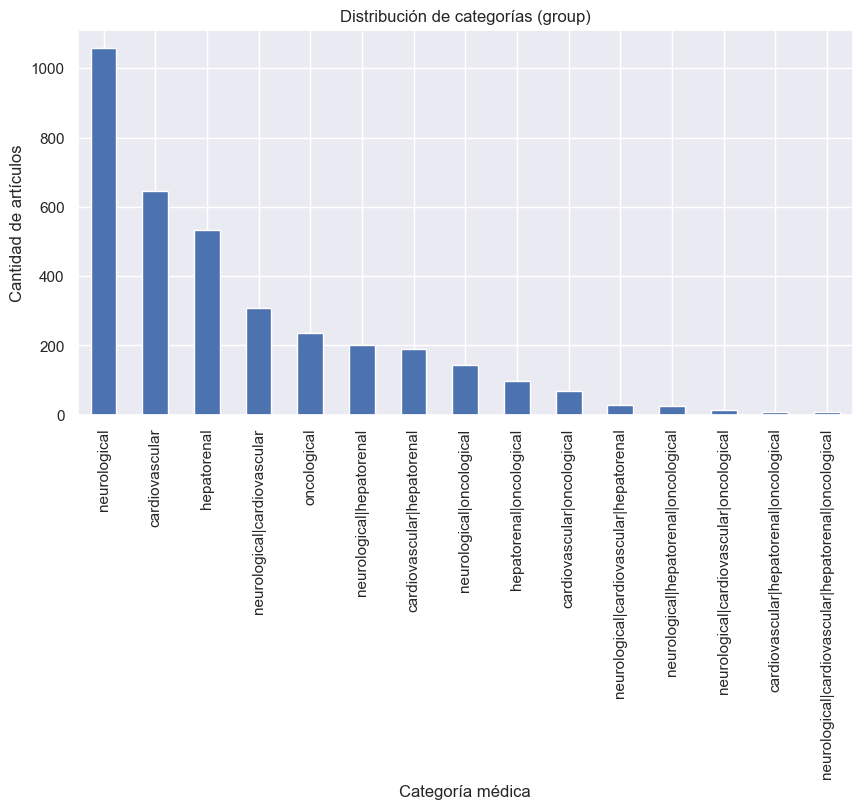

In [7]:
#Distribución de categorías
df['group'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribución de categorías (group)")
plt.xlabel("Categoría médica")
plt.ylabel("Cantidad de artículos")
plt.show()

In [15]:
df['text'] = (df['title'].fillna('') + ' ' + df['abstract'].fillna('')).str.strip()
#crearcolumna de texto unificado


In [16]:
import re  #lista de etiquetas por fila
df['labels_list'] = df['group'].astype(str).apply(lambda x: [s.strip() for s in re.split(r'[,\|/]', x) if s.strip()])

In [17]:
df.to_csv("../data/dataset_prepared.csv", index=False)
